In [185]:
import numpy as np
import pandas as pd

In [186]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')

#Data Cleaning

In [187]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [188]:
df.shape

(5572, 5)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [190]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [191]:
df.sample(5)


,v1,v2
1743,ham,I love to wine and dine my lady!
1772,ham,Good afternoon sexy buns! How goes the job sea...
1722,ham,Thought praps you meant another one. Goodo! I'...
3748,spam,Dear Voucher Holder 2 claim your 1st class air...
2050,ham,Hi where you. You in home or calicut?


In [192]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
174,ham,"Well, i'm gonna finish my bath now. Have a goo..."
3106,ham,Hi. Happy New Year. I dont mean to intrude but...
5117,ham,Aslamalaikkum....insha allah tohar beeen muht ...
4897,ham,Oh for fuck's sake she's in like tallahassee
2204,ham,Raji..pls do me a favour. Pls convey my Birthd...


In [193]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [194]:
df['target'] = encoder.fit_transform(df['target'])


In [195]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [196]:
df.isnull().sum()

,0
target,0
text,0


In [197]:
df.duplicated().sum()


np.int64(403)

In [198]:
df = df.drop_duplicates(keep='first')


In [199]:
df.duplicated().sum()


np.int64(0)

In [200]:
df.shape


(5169, 2)

2.EDA

In [201]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [202]:
df['target'].value_counts()


,count
target,
0,4516
1,653


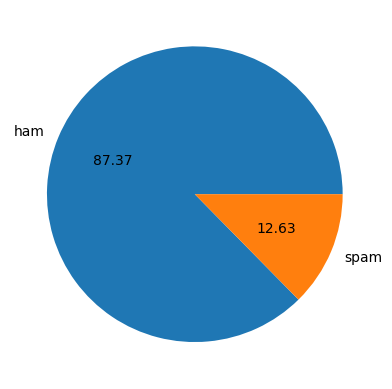

In [203]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [204]:
import nltk
!pip install nltk


In [205]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [206]:
df['num_characters'] = df['text'].apply(len)


/tmp/ipython-input-3217166257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [207]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [208]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [209]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


/tmp/ipython-input-3415209415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [210]:
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [211]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [212]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [213]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [214]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [215]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [216]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

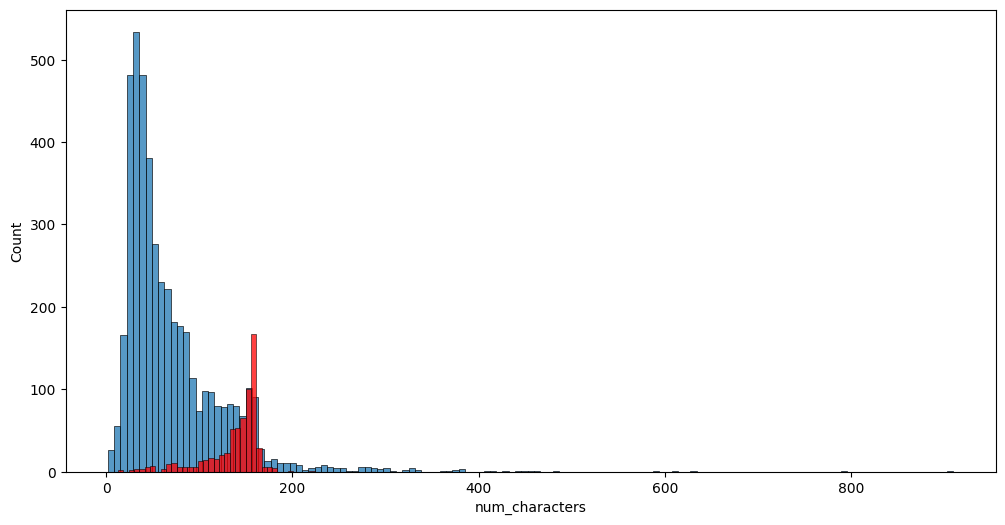

In [217]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

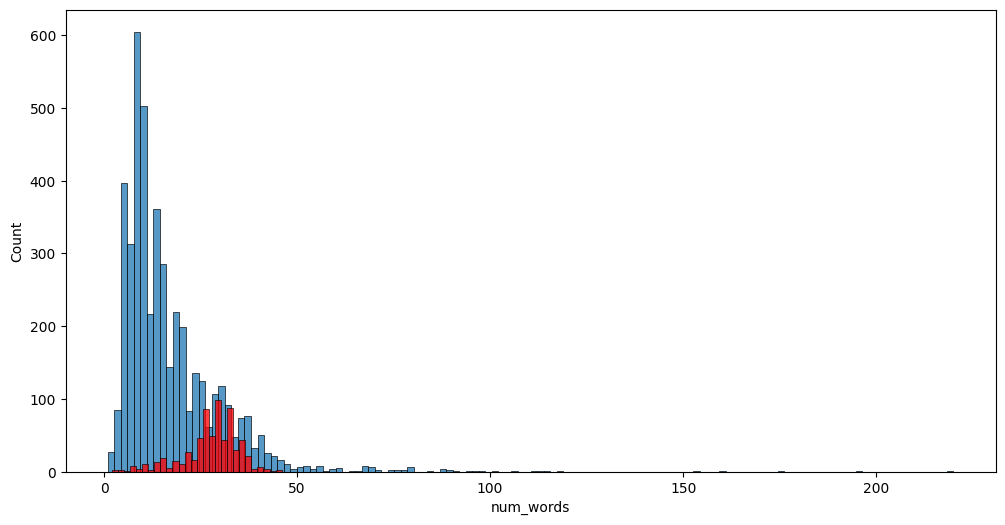

In [218]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

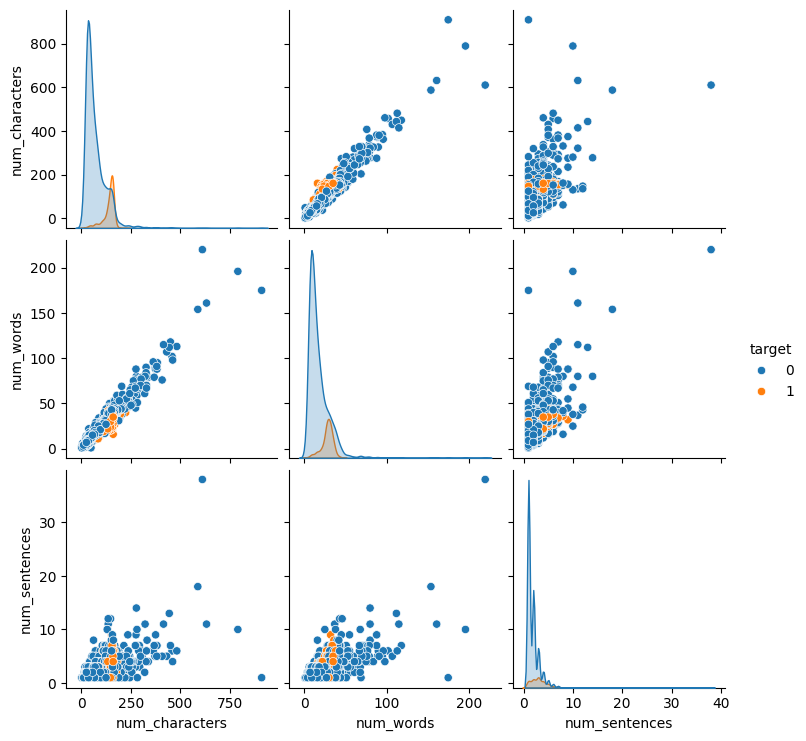

In [219]:
sns.pairplot(df,hue='target')


3.Data preprocessing

In [220]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

nltk.download('stopwords')
nltk.download('punkt')


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [221]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [222]:
df['transformed_text'] = df['text'].apply(transform_text)


/tmp/ipython-input-87086937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [223]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [225]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


 Linear Regression


In [226]:
X = df[['num_characters', 'num_words', 'num_sentences']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_cont = model.predict(X_test)
y_pred = [1 if val >= 0.5 else 0 for val in y_pred_cont]

# y_pred

In [227]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test, y_pred))


Accuracy: 0.9003868471953579
Mean Squared Error: 0.09961315280464217
Root Mean Squared Error: 0.3156155142014444
R² Score: 0.17379465497847268


In [228]:

new_data=[[50,10,6]]
prediction = model.predict(new_data)
y_pred = [1 if val >= 0.5 else 0 for val in prediction]
print("Predicted continuous value:", y_pred)


Predicted continuous value: [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [229]:

new_data=[[100,20,6]]
prediction = model.predict(new_data)
y_pred = [1 if val >= 0.5 else 0 for val in prediction]
print("Predicted continuous value:", y_pred)


Predicted continuous value: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Linear Regression on polynomial features

In [230]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred_cont = model.predict(X_test_poly)

y_pred = [1 if val >= 0.5 else 0 for val in y_pred_cont]

# y_pred

In [231]:
new_data=[[30,4,3]]
new_data_poly = poly.transform(new_data)
prediction = model.predict(new_data_poly)
y_pred = [1 if val >= 0.5 else 0 for val in prediction]
print("Predicted continuous value:", y_pred)

Predicted continuous value: [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [232]:
new_data=[[100,20,6]]
new_data_poly = poly.transform(new_data)
prediction = model.predict(new_data_poly)
y_pred = [1 if val >= 0.5 else 0 for val in prediction]
print("Predicted continuous value:", y_pred)

Predicted continuous value: [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [233]:
from sklearn.metrics import accuracy_score

y_pred = [1 if val >= 0.5 else 0 for val in y_pred_cont]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test, y_pred))

Accuracy: 0.9129593810444874
Mean Squared Error: 0.08704061895551257
Root Mean Squared Error: 0.29502647161824747
R² Score: 0.2780729994957528


#Classification model

In [234]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(df['transformed_text']).toarray()


In [235]:
X.shape

(5169, 3000)

In [236]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [238]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [239]:
mnb = MultinomialNB() # Multinomial Naive Bayes
bnb = BernoulliNB() # Bernoulli Naive Bayes

In [240]:
# Used when features are counts, like how many times a word appears.
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

# Confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", cm2)


Accuracy: 0.9748549323017408
Precision: 0.9057971014492754
Confusion Matrix:
 [[883  13]
 [ 13 125]]


In [241]:
# Used when features are binary (0 or 1), e.g., word is present or not.
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

# Confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", cm3)


Accuracy: 0.9835589941972921
Precision: 0.991869918699187
Confusion Matrix:
 [[895   1]
 [ 16 122]]


In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [243]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [244]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [245]:
svc = SVC()
svc.fit(X_train, y_train)

# Predict
y_pred = svc.predict(X_test)

# Print evaluation metrics
print("Support Vector Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1-Score:", f1_score(y_test, y_pred, pos_label=1))

# Optional: confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Support Vector Classifier:
Accuracy: 0.9700193423597679
Precision: 0.9908256880733946
Recall: 0.782608695652174
F1-Score: 0.8744939271255061
Confusion Matrix:
 [[895   1]
 [ 30 108]]


In [246]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

# Predict on test data
y_pred = knc.predict(X_test)

# Print evaluation metrics
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))  # 1 = spam
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1-Score:", f1_score(y_test, y_pred, pos_label=1))

# Optional: confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

K-Nearest Neighbors:
Accuracy: 0.9129593810444874
Precision: 1.0
Recall: 0.34782608695652173
F1-Score: 0.5161290322580645
Confusion Matrix:
 [[896   0]
 [ 90  48]]


In [247]:
# Example input
new_email = ["""
Dear Winner,

Congratulations! You have been specially selected from thousands of participants
worldwide to receive a $1,000,000 cash prize from the Global Rewards Program!
This is a limited-time offer, and you must act immediately to claim your reward.

To ensure you receive your prize, please provide your full name, date of birth,
bank account details, and a copy of a government-issued ID. Your confidential
information will be securely processed, and your funds will be transferred
directly to your account within 24 hours.

Additionally, you are eligible to receive a free iPhone 15 Pro Max, an all-expenses-paid
luxury vacation to Bali, and a lifetime subscription to our exclusive VIP membership.
Click the link below to verify your identity and claim all your rewards now:

[Click Here to Claim Your Prize]

Hurry! This offer expires within 48 hours. Failure to respond will result in your
prize being forfeited. Act now and start living your dream life today!

Best regards,
The Global Rewards Team
"""]

# Convert new email to vector (must use the same vectorizer!)
new_email_vector = cv.transform(new_email)

# Predict
prediction = knc.predict(new_email_vector)

# print(prediction)

if prediction[0] == 1:
    print("Result:  Spam Email")
else:
    print("Result:  Not Spam Email")



Result:  Spam Email


In [248]:
# Example input
new_email = ["""
Hi Sana,

I hope you had a restful weekend and that your week is off to a good start.

I wanted to share a detailed update on the Q3 product onboarding project and outline next steps so the team is aligned. Over the past two weeks we completed the following:

1. Content migration — The user guides and FAQ pages were migrated to the new CMS. The migration script preserved metadata and tags; I spot-checked 50 pages and corrected formatting on those that had minor issues.
2. Analytics setup — Tracking events for the onboarding funnel were implemented in Google Analytics and the internal dashboard. The events are firing correctly for the first, second, and third-step conversions; however, we need to add a custom event for the 'skip tour' action, which I’ve added to the backlog.
3. Internal training — We completed two training sessions with Customer Success (CS) and the recordings are uploaded to the shared drive under `/training/q3/onboarding/`. CS requested a short one-page cheat sheet summarizing common troubleshooting steps — I drafted that and attached it to this email as `onboarding_cheatsheet_v1.pdf`.

Action items and deadlines:
- Design review: Priya will deliver the final UI assets by Wednesday, October 15. Please review and provide any UI comments within 48 hours of delivery so we can stay on schedule.
- QA: I’ve scheduled QA for Monday, October 20 — testers will validate flows on desktop, iOS, and Android. If you have specific devices or edge cases to prioritize, let me know by Friday.
- Documentation: I’ll update the knowledge-base article draft and send it for your review by Friday afternoon. If you could add a short paragraph about the escalation path for technical issues, that would be helpful.

Risks & mitigation:
- Potential delay if we find critical bugs during the first QA pass. To mitigate this, the dev team has reserved two additional sprints for hotfixes and quick patches.
- Some legacy users may not see updated onboarding due to cached static files; the ops team will run a cache invalidation job post-deployment and will notify support once complete.

Please confirm whether the proposed schedule works for you and whether you want me to include Product Marketing in the next sync — they have requested a brief walkthrough so they can prepare the launch email and in-app notifications.

Attachments:
- onboarding_cheatsheet_v1.pdf
- migration_report_q3.xlsx (detailed list of migrated pages and metadata)
- analytics_event_spec.md

Thanks for your help — appreciate any feedback or additions. If you prefer a quick call instead of email, I’m available Tuesday and Thursday between 2:00–4:30 PM IST.

Best regards,
Amit Rao
Product Manager, Onboarding
example-company.com
"""]

# Convert new email to vector (must use the same vectorizer!)
new_email_vector = cv.transform(new_email)

# Predict
prediction = knc.predict(new_email_vector)

# print(prediction)

if prediction[0] == 1:
    print("Result:  Spam Email")
else:
    print("Result:  Not Spam Email")



Result:  Not Spam Email


In [249]:
lrc = LogisticRegression()
lrc.fit(X_train, y_train)

# Predict on test data
y_pred = lrc.predict(X_test)

# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))  # 1 = spam
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1-Score:", f1_score(y_test, y_pred, pos_label=1))

# Optional: confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression:
Accuracy: 0.9806576402321083
Precision: 0.9916666666666667
Recall: 0.8623188405797102
F1-Score: 0.9224806201550387
Confusion Matrix:
 [[895   1]
 [ 19 119]]


In [250]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

# Predict on test data
y_pred = dtc.predict(X_test)

# Print evaluation metrics
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))  # 1 = spam
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1-Score:", f1_score(y_test, y_pred, pos_label=1))

# Optional: confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree:
Accuracy: 0.9245647969052224
Precision: 0.9166666666666666
Recall: 0.4782608695652174
F1-Score: 0.6285714285714286
Confusion Matrix:
 [[890   6]
 [ 72  66]]


In [251]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict on test data
y_pred = rfc.predict(X_test)

# Print evaluation metrics
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))  # 1 = spam
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1-Score:", f1_score(y_test, y_pred, pos_label=1))

# Optional: confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest:
Accuracy: 0.9738878143133463
Precision: 0.9826086956521739
Recall: 0.8188405797101449
F1-Score: 0.8932806324110671
Confusion Matrix:
 [[894   2]
 [ 25 113]]


In [252]:
# Gather the performance metrics for each classification model

# Multinomial Naive Bayes (mnb) - from cell 6TZNTo-M5_mV
mnb_accuracy = accuracy_score(y_test, y_pred2)
mnb_precision = precision_score(y_test, y_pred2, pos_label=1)


# Support Vector Classifier (svc) - from cell 1wlNOa0ZiFVJ
svc_accuracy = accuracy_score(y_test, svc.predict(X_test))
svc_precision = precision_score(y_test, svc.predict(X_test), pos_label=1)
svc_recall = recall_score(y_test, svc.predict(X_test), pos_label=1)
svc_f1 = f1_score(y_test, svc.predict(X_test), pos_label=1)


# K-Nearest Neighbors (knc) - from cell m4key0ZRiR67
knc_accuracy = accuracy_score(y_test, knc.predict(X_test))
knc_precision = precision_score(y_test, knc.predict(X_test), pos_label=1)
knc_recall = recall_score(y_test, knc.predict(X_test), pos_label=1)
knc_f1 = f1_score(y_test, knc.predict(X_test), pos_label=1)

# Logistic Regression (lrc) - from cell gydw-XjFXaKJ
lrc_accuracy = accuracy_score(y_test, lrc.predict(X_test))
lrc_precision = precision_score(y_test, lrc.predict(X_test), pos_label=1)
lrc_recall = recall_score(y_test, lrc.predict(X_test), pos_label=1)
lrc_f1 = f1_score(y_test, lrc.predict(X_test), pos_label=1)

# Decision Tree (dtc) - from cell MqsRJ9o9iU6n
dtc_accuracy = accuracy_score(y_test, dtc.predict(X_test))
dtc_precision = precision_score(y_test, dtc.predict(X_test), pos_label=1)
dtc_recall = recall_score(y_test, dtc.predict(X_test), pos_label=1)
dtc_f1 = f1_score(y_test, dtc.predict(X_test), pos_label=1)

# Random Forest (rfc) - from cell vP4NkwqWiauT
rfc_accuracy = accuracy_score(y_test, rfc.predict(X_test))
rfc_precision = precision_score(y_test, rfc.predict(X_test), pos_label=1)
rfc_recall = recall_score(y_test, rfc.predict(X_test), pos_label=1)
rfc_f1 = f1_score(y_test, rfc.predict(X_test), pos_label=1)


# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Multinomial Naive Bayes', 'Support Vector Classifier', 'K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [mnb_accuracy,  svc_accuracy, knc_accuracy, lrc_accuracy, dtc_accuracy, rfc_accuracy],
    'Precision': [mnb_precision, svc_precision, knc_precision, lrc_precision, dtc_precision, rfc_precision],
    'Recall': [np.nan,  svc_recall, knc_recall, lrc_recall, dtc_recall, rfc_recall], # Recall not explicitly printed for Naive Bayes
    'F1-Score': [np.nan, svc_f1, knc_f1, lrc_f1, dtc_f1, rfc_f1] # F1-Score not explicitly printed for Naive Bayes
})

# Sort by Accuracy for better comparison
results = results.sort_values(by='Accuracy', ascending=False)

display(results)

,Model,Accuracy,Precision,Recall,F1-Score
3,Logistic Regression,0.980658,0.991667,0.862319,0.922481
0,Multinomial Naive Bayes,0.974855,0.905797,NaN,NaN
5,Random Forest,0.973888,0.982609,0.818841,0.893281
1,Support Vector Classifier,0.970019,0.990826,0.782609,0.874494
4,Decision Tree,0.924565,0.916667,0.478261,0.628571
2,K-Nearest Neighbors,0.912959,1.000000,0.347826,0.516129


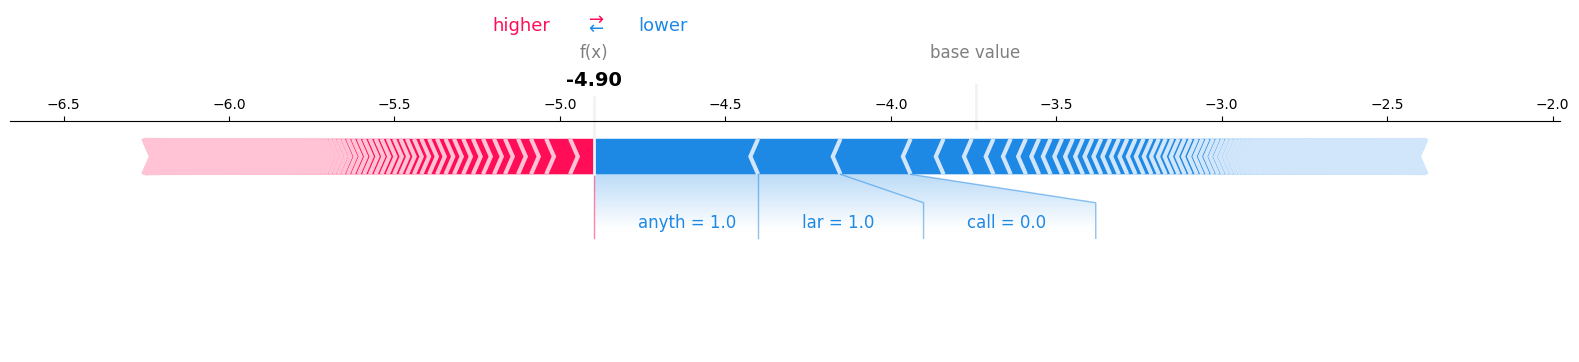

In [253]:
# Add shap for feature extraction of words

import shap

# Train a model (using Logistic Regression as an example)
# Already trained in cell gydw-XjFXaKJ

# Create a SHAP explainer
# Use the training data to estimate the background distribution
explainer = shap.LinearExplainer(lrc, X_train)

# Select a sample from the test data to explain
sample_index = 0 # You can change this index to explain a different email
sample_text_vector = X_test[sample_index]

# Reshape the sample for prediction and SHAP value calculation
sample_text_vector_reshaped = sample_text_vector.reshape(1, -1)

# Calculate SHAP values
shap_values = explainer.shap_values(sample_text_vector_reshaped)

# Get the feature names (words) from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Visualize the SHAP explanation for the sample prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], features=sample_text_vector, feature_names=feature_names, matplotlib=True)

In [254]:
# Get the SHAP values and feature names
shap_values_list = shap_values[0, :] # Assuming you are explaining a single instance (index 0)
feature_names_list = feature_names

# Create a list of tuples (word, SHAP value)
word_shap_values = list(zip(feature_names_list, shap_values_list))

# Sort the words by the absolute SHAP value in descending order
word_shap_values_sorted = sorted(word_shap_values, key=lambda item: abs(item[1]), reverse=True)

# Display the top N contributing words and their SHAP values
N = 20  # You can change this number to display more or fewer words
print(f"Top {N} contributing words and their SHAP values:")
for word, shap_value in word_shap_values_sorted[:N]:
    print(f"Word: '{word}', SHAP Value: {shap_value:.4f}")

Top 20 contributing words and their SHAP values:
Word: 'anyth', SHAP Value: -0.4949
Word: 'lar', SHAP Value: -0.2490
Word: 'call', SHAP Value: -0.2120
Word: 'txt', SHAP Value: -0.0995
Word: 'text', SHAP Value: -0.0850
Word: 'gt', SHAP Value: 0.0736
Word: 'lt', SHAP Value: 0.0720
Word: 'mobil', SHAP Value: -0.0659
Word: 'servic', SHAP Value: -0.0520
Word: 'new', SHAP Value: -0.0459
Word: 'know', SHAP Value: 0.0458
Word: 'day', SHAP Value: -0.0399
Word: 'got', SHAP Value: 0.0393
Word: 'ok', SHAP Value: 0.0393
Word: 'rington', SHAP Value: -0.0349
Word: 'special', SHAP Value: -0.0346
Word: 'wat', SHAP Value: 0.0332
Word: 'da', SHAP Value: 0.0331
Word: 'ur', SHAP Value: -0.0326
Word: 'one', SHAP Value: 0.0307


/tmp/ipython-input-845660227.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shap_values, y=words, palette='coolwarm')


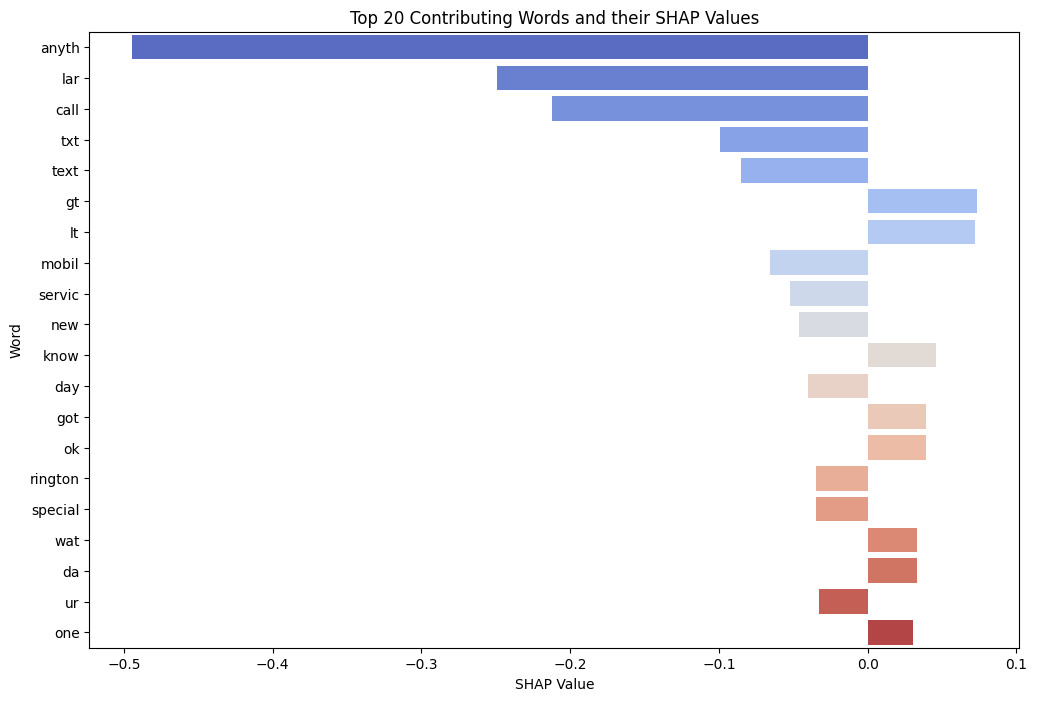

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top N words and their SHAP values
N = 20 # Use the same N as in the previous cell
top_words = word_shap_values_sorted[:N]
words = [item[0] for item in top_words]
shap_values = [item[1] for item in top_words]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=shap_values, y=words, palette='coolwarm')
plt.title(f'Top {N} Contributing Words and their SHAP Values')
plt.xlabel('SHAP Value')
plt.ylabel('Word')
plt.show()

In [256]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


#Clustering

## K-Mean Clustering

In [257]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# Select numeric features for clustering
X = df[['num_characters', 'num_words', 'num_sentences']]

# Apply K-Means with 2 clusters (ham and spam)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X)

# Add cluster labels to the dataframe
df.loc[:, 'cluster'] = kmeans.labels_  # Use .loc to avoid SettingWithCopyWarning

# Evaluate clustering using Adjusted Rand Score (compare with true labels)
ari_score = adjusted_rand_score(df['target'], df['cluster'])
print(f"Adjusted Rand Score: {ari_score:.4f}")

# Crosstab to see alignment between actual labels and clusters
print("\nCrosstab of Target vs. Cluster:")
print(pd.crosstab(df['target'], df['cluster']))


Adjusted Rand Score: 0.2855

Crosstab of Target vs. Cluster:
cluster     0    1
target            
0        3524  992
1          71  582


/tmp/ipython-input-679312616.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cluster'] = kmeans.labels_  # Use .loc to avoid SettingWithCopyWarning


In [258]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score
# from sklearn.decomposition import PCA

# # Apply K-Means clustering with 2 clusters (for ham and spam)
# # n_init='auto' is set to avoid a future warning
# kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
# kmeans.fit(X)

# # Add the resulting cluster labels to the dataframe
# # Note: The cluster labels (0 and 1) are arbitrary and may not match the target labels (0=ham, 1=spam)
# df['cluster'] = kmeans.labels_

# # Evaluate the clustering against the true labels
# ari_score = adjusted_rand_score(df['target'], df['cluster'])
# print(f"Adjusted Rand Score: {ari_score:.4f}")

# # The Adjusted Rand Score measures the similarity between two clusterings.
# # A score of 1.0 means perfect agreement, while a score near 0.0 suggests random labeling.

# # Create a crosstab to see how the clusters align with the actual targets
# print("\nCrosstab of Target vs. Cluster:")
# print(pd.crosstab(df['target'], df['cluster']))

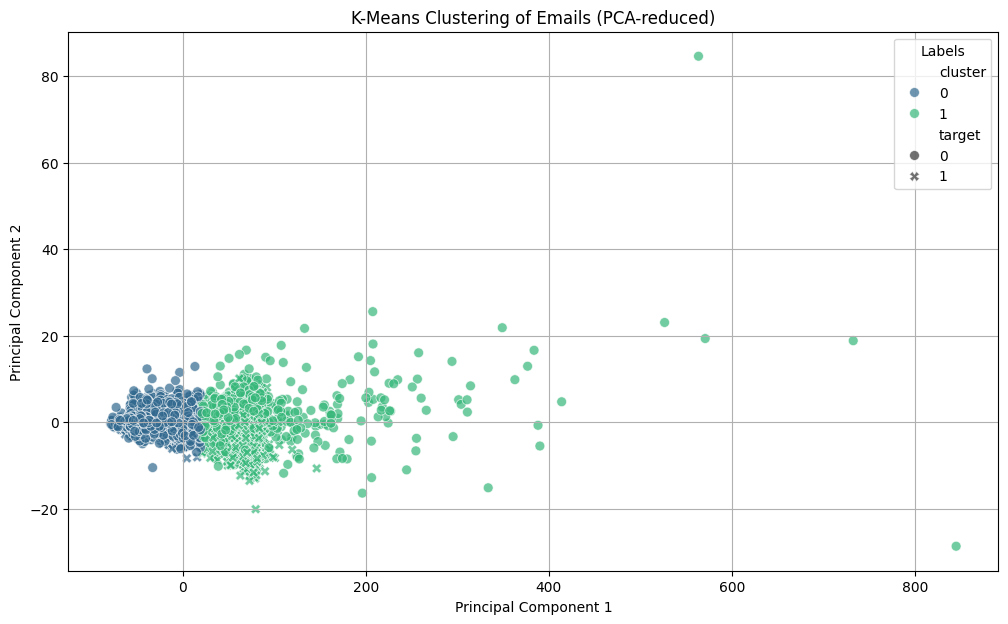

In [259]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create new DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster'].values
df_pca['target'] = df['target'].values

# -----------------------------
# Plot clusters
# -----------------------------
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='cluster',
    style='target',
    palette='viridis',
    s=50,
    alpha=0.7
)
plt.title('K-Means Clustering of Emails (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.grid(True)
plt.show()

#

## Gaussian Mixture Models (GMM)

> Add blockquote



In [260]:
from sklearn.mixture import GaussianMixture

X = df[['num_characters', 'num_words', 'num_sentences']]

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Add cluster labels to DataFrame
df['gmm_cluster'] = gmm.predict(X)

gmm_ari_score = adjusted_rand_score(df['target'], df['gmm_cluster'])
print(f"Adjusted Rand Score (GMM): {gmm_ari_score:.4f}")

print("\nCrosstab of Target vs. GMM Cluster:")

print(pd.crosstab(df['target'], df['gmm_cluster']))

Adjusted Rand Score (GMM): 0.1324

Crosstab of Target vs. GMM Cluster:
gmm_cluster     0     1
target                 
0            2950  1566
1              37   616


/tmp/ipython-input-3718179276.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gmm_cluster'] = gmm.predict(X)


In [261]:
# from sklearn.mixture import GaussianMixture

# # Apply Gaussian Mixture Models with 2 components
# gmm = GaussianMixture(n_components=2, random_state=42)
# gmm.fit(X)

# # Add the resulting cluster labels to the dataframe
# # The labels here represent the component assigned to each data point
# df['gmm_cluster'] = gmm.predict(X)

# # Evaluate the clustering against the true labels using Adjusted Rand Score
# gmm_ari_score = adjusted_rand_score(df['target'], df['gmm_cluster'])
# print(f"Adjusted Rand Score (GMM): {gmm_ari_score:.4f}")

# # Create a crosstab to see how the GMM clusters align with the actual targets
# print("\nCrosstab of Target vs. GMM Cluster:")
# print(pd.crosstab(df['target'], df['gmm_cluster']))

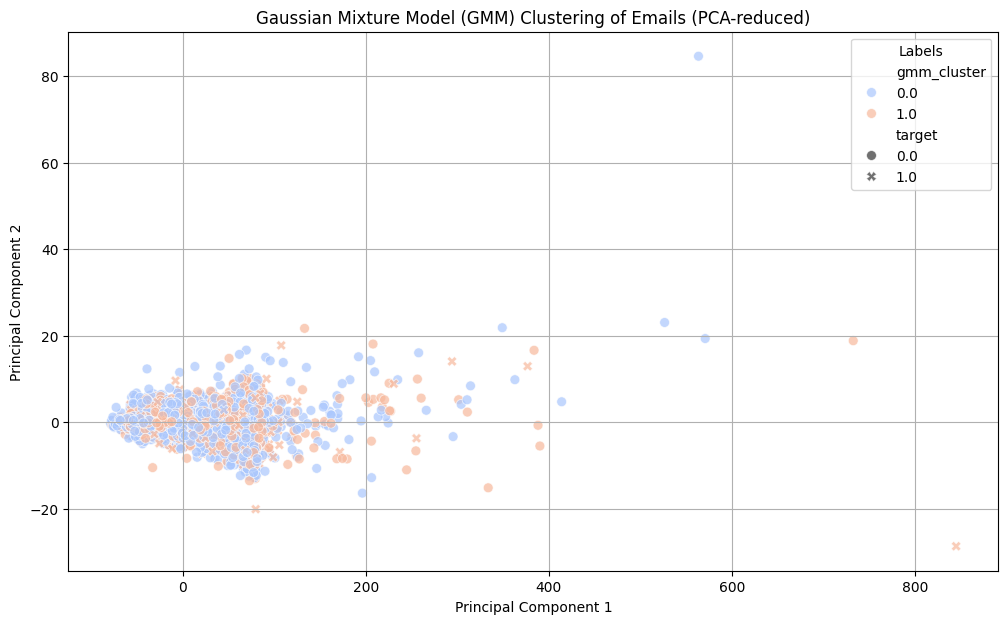

In [262]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a new DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['gmm_cluster'] = df['gmm_cluster']
df_pca['target'] = df['target']

# ------------------------------------
# Step 5: Plot GMM Clusters
# ------------------------------------
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='gmm_cluster',
    style='target',
    palette='coolwarm',
    s=50,
    alpha=0.7
)
plt.title('Gaussian Mixture Model (GMM) Clustering of Emails (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.grid(True)
plt.show()

## Birch Clustering (Balanced Iterative Reducing and Clustering using Hierarchies)
BIRCH is used when the dataset is very large and you want to cluster it quickly and efficiently without using too much memory.


In [263]:
from sklearn.cluster import Birch
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


X = df[['num_characters', 'num_words', 'num_sentences']]

# Apply Birch clustering with 2 clusters (for ham/spam)
birch = Birch(n_clusters=2)
birch.fit(X)

# Add the resulting cluster labels to the dataframe
df['birch_cluster'] = birch.labels_

# Evaluate the clustering using Adjusted Rand Index
birch_ari_score = adjusted_rand_score(df['target'], df['birch_cluster'])
print(f"Adjusted Rand Score (Birch): {birch_ari_score:.4f}")

# Crosstab: compare predicted clusters with actual labels
print("\nCrosstab of Target vs. Birch Cluster:")
print(pd.crosstab(df['target'], df['birch_cluster']))



Adjusted Rand Score (Birch): 0.3468

Crosstab of Target vs. Birch Cluster:
birch_cluster    0     1
target                  
0              759  3757
1              537   116


/tmp/ipython-input-3542372537.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birch_cluster'] = birch.labels_


In [264]:
# from sklearn.cluster import Birch

# # Apply Birch clustering with 2 components
# birch = Birch(n_clusters=2)
# birch.fit(X)

# # Add the resulting cluster labels to the dataframe
# df['birch_cluster'] = birch.labels_

# # Evaluate the clustering against the true labels using Adjusted Rand Score
# birch_ari_score = adjusted_rand_score(df['target'], df['birch_cluster'])
# print(f"Adjusted Rand Score (Birch): {birch_ari_score:.4f}")

# # Create a crosstab to see how the Birch clusters align with the actual targets
# print("\nCrosstab of Target vs. Birch Cluster:")
# print(pd.crosstab(df['target'], df['birch_cluster']))

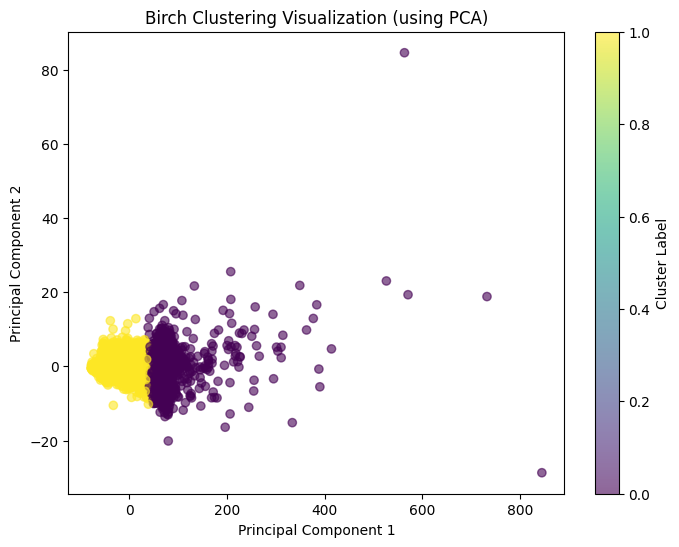

In [265]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['birch_cluster'], cmap='viridis', alpha=0.6)
plt.title("Birch Clustering Visualization (using PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

# Interpretation

  1) Two overlapping groups:
  The blue and green dots overlap significantly — this means K-Means couldn’t clearly separate spam and ham emails using the numeric features (num_characters, num_words, num_sentences).


  2) One dense cluster (blue, left):
  Likely represents mostly ham (normal) emails — shorter and more consistent in length and word count.


  3) More scattered cluster (green, right):
   Likely contains spam emails — they vary more in message length and structure.


  4) Overlap region:
  The overlap between green and blue shows that some spam and ham messages have similar text lengths, making them hard to distinguish using only these numeric features.


 5) Outliers and Spread

    A few purple points far away on the right or top represent outliers — emails that are unusually long or have extreme values.

    These might be very long spam messages or special cases that don’t fit neatly into either cluster.
